In [1]:
import numpy as np
from PIL import Image
import torchvision
import torch.optim as optim
import torch
from torchvision import transforms
from pylab import *

In [2]:
x = Image.open(
    r'data/data2fIm/input2d1.jpg').convert('L')
y = np.asarray(x.getdata(), dtype=np.float64).reshape((x.size[1], x.size[0]))
target_x = Image.open(
    r'data/label2fIm/target2l1.jpg').convert('L')
target_y = np.asarray(target_x.getdata(), dtype=np.float64).reshape(
    (target_x.size[1], target_x.size[0]))

torch.Size([1, 1, 128, 128])


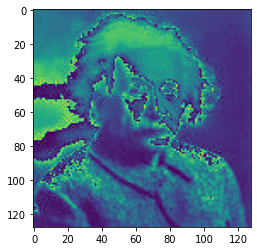

In [10]:
y1 = np.asarray(y, dtype=np.uint8)
y1_im = transforms.ToTensor()(y1).unsqueeze_(0)
print(y1_im.shape)
plt.imshow(y1)

torch.Size([1, 1, 128, 128])


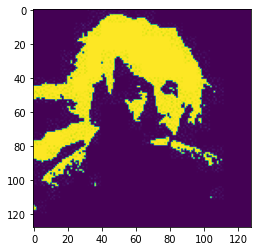

In [11]:
target_y1 = y1 = np.asarray(target_y, dtype=np.uint8)
target_y1_im = transforms.ToTensor()(target_y1).unsqueeze_(0)
print(target_y1_im.shape)
plt.imshow(target_y1)

In [12]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        #3-> 3 colors and output size 6, and kernel size is 5
        self.pool = nn.MaxPool2d(2, 2)
        # 2x2 pooling
        self.conv2 = nn.Conv2d(6, 62, 5)
        # input is last input 6, and output is 16, just 16, and kernel size is 5
        self.fc1 = nn.Linear(62*29*29, 120)
        #input of 16*5*5, output is 120 just randomw
        self.fc2 = nn.Linear(120, 62)
        #input of last number 120, and 84 randome
        self.fc3 = nn.Linear(62, 62*29*29)
        #output is 62*29*29  corrspond all the data.

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 62*29*29)            # -> n, 52142
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 52142
        return x
    
net = Net()

In [13]:
cv1 = nn.Conv2d(1, 6, 5)
target=cv1(target_y1_im)
print(target.shape)
pl = nn.MaxPool2d(2, 2)
target=pl(target)
print(target.shape)
cv2 = nn.Conv2d(6, 62, 5)
target=cv2(target)
print(target.shape)
target=pl(target)
print(target.shape)
target = target.view(-1, 62*29*29)
print(target.shape)

torch.Size([1, 6, 124, 124])
torch.Size([1, 6, 62, 62])
torch.Size([1, 62, 58, 58])
torch.Size([1, 62, 29, 29])
torch.Size([1, 52142])


In [14]:
target

tensor([[0.0401, 0.0401, 0.0401,  ..., 0.0421, 0.0421, 0.0421]],
       grad_fn=<ViewBackward>)

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

inputs = y1_im
labels = target

cuda:0


In [16]:
for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0

    # get the inputs; data is a list of [inputs, labels]

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, torch.max(labels, 1)[1])
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    print(epoch,"iteration L= ",running_loss);

print('Finished Training')

0 iteration L=  10.951196670532227
1 iteration L=  10.94452953338623
2 iteration L=  10.93410873413086
3 iteration L=  10.92176342010498
4 iteration L=  10.908048629760742
5 iteration L=  10.894821166992188
6 iteration L=  10.881612777709961
7 iteration L=  10.867796897888184
8 iteration L=  10.852867126464844
9 iteration L=  10.837165832519531
10 iteration L=  10.821332931518555
11 iteration L=  10.804956436157227
12 iteration L=  10.788018226623535
13 iteration L=  10.770597457885742
14 iteration L=  10.751764297485352
15 iteration L=  10.731476783752441
16 iteration L=  10.70977783203125
17 iteration L=  10.686285972595215
18 iteration L=  10.66103458404541
19 iteration L=  10.635578155517578
20 iteration L=  10.608439445495605
21 iteration L=  10.578779220581055
22 iteration L=  10.547520637512207
23 iteration L=  10.51318645477295
24 iteration L=  10.474770545959473
25 iteration L=  10.432024002075195
26 iteration L=  10.384905815124512
27 iteration L=  10.332200050354004
28 itera

In [17]:
outputs = net(y1_im)

In [18]:
cv1 = nn.Conv2d(1, 6, 5)
cv2 = nn.Conv2d(6, 62, 5)

pl = nn.MaxPool2d(2,stride=2, return_indices=True)
unpl = nn.MaxUnpool2d(2, 2)
print(target_y1_im.shape)
target0=cv1(target_y1_im)
print(target0.shape)

target1, indices1 =pl(target0)
print(target1.shape)

target2=cv2(target1)
print(target2.shape)

target3, indices2=pl(target2)
print(target3.shape)

target4 = target3.view(-1, 62*29*29)
print(target4.shape)

target5=target4.reshape([1,62,29,29])
print(target5.shape)

target6=unpl(target5,indices2, output_size=target2.size())
print(target6.shape)

revcv2 = nn.ConvTranspose2d(62, 6, 5)
target7=revcv2(target6, output_size=target1.size())
print(target7.shape)

target8=unpl(target7,indices1, output_size=target0.size())
print(target8.shape)

revcv1 = nn.ConvTranspose2d(6, 1, 5)
target9=revcv1(target8, output_size=target_y1_im.size())
print(target9.shape)

torch.Size([1, 1, 128, 128])
torch.Size([1, 6, 124, 124])
torch.Size([1, 6, 62, 62])
torch.Size([1, 62, 58, 58])
torch.Size([1, 62, 29, 29])
torch.Size([1, 52142])
torch.Size([1, 62, 29, 29])
torch.Size([1, 62, 58, 58])
torch.Size([1, 6, 62, 62])
torch.Size([1, 6, 124, 124])
torch.Size([1, 1, 128, 128])


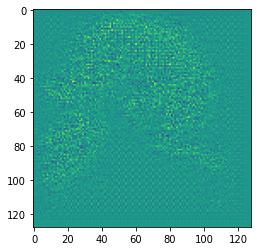

In [19]:
plt.imshow(target9[0][0].detach().cpu().numpy())

In [21]:
cv1 = nn.Conv2d(1, 6, 5)
cv2 = nn.Conv2d(6, 62, 5)

outputs1=outputs.reshape([1,62,29,29])
print(outputs1.shape)

outputs2=unpl(outputs1,indices2, output_size=target2.size())
print(outputs2.shape)

revcv2 = nn.ConvTranspose2d(62, 6, 5)
outputs3=revcv2(outputs2, output_size=target1.size())
print(outputs3.shape)

outputs4=unpl(outputs3,indices1, output_size=target0.size())
print(outputs4.shape)

revcv1 = nn.ConvTranspose2d(6, 1, 5)
outputs5=revcv1(outputs4, output_size=target_y1_im.size())
print(outputs5.shape)

torch.Size([1, 62, 29, 29])
torch.Size([1, 62, 58, 58])
torch.Size([1, 6, 62, 62])
torch.Size([1, 6, 124, 124])
torch.Size([1, 1, 128, 128])


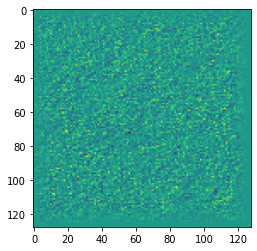

In [22]:
plt.imshow(outputs5[0][0].detach().cpu().numpy())